# Importing necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer

from sklearn.base import BaseEstimator, TransformerMixin

# Load dataset and take a quick look at the data structure

In [2]:
housing = pd.read_csv('housing.csv') 
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


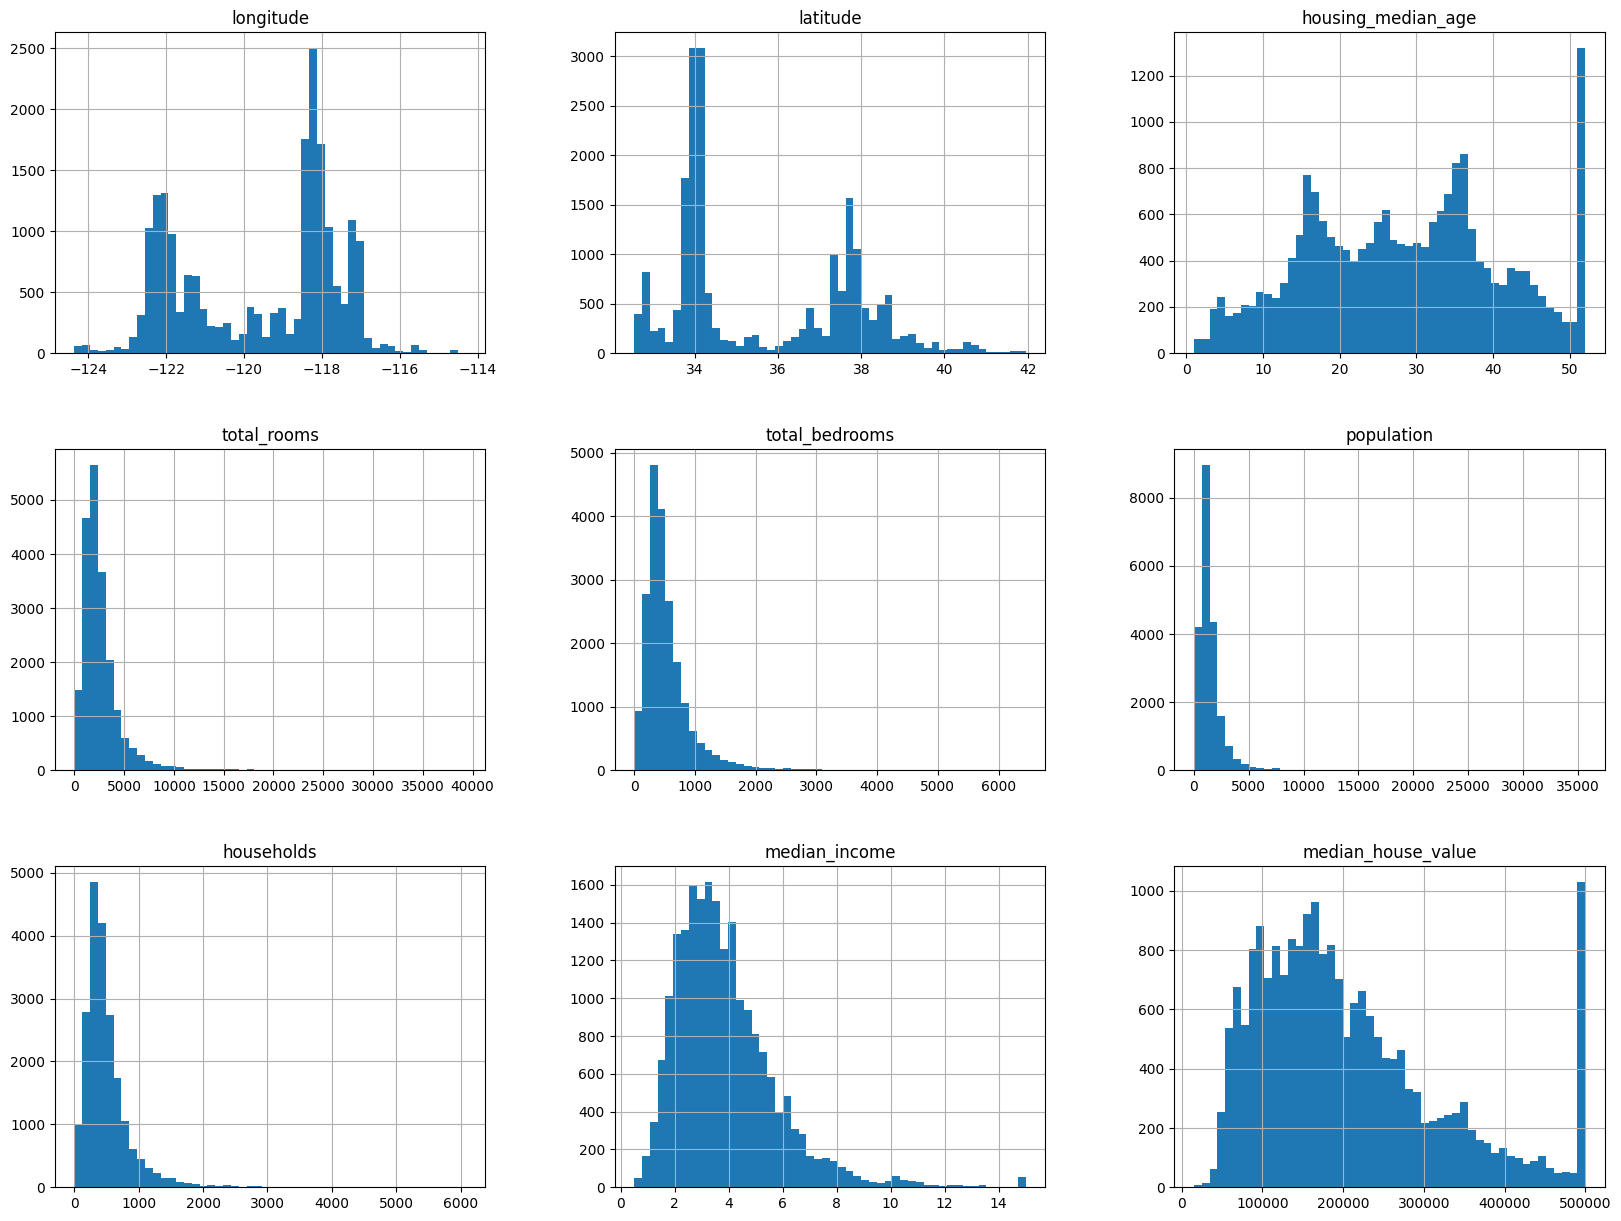

In [6]:
housing.hist(bins=50, figsize=(20,15)) 
plt.show()

<Axes: >

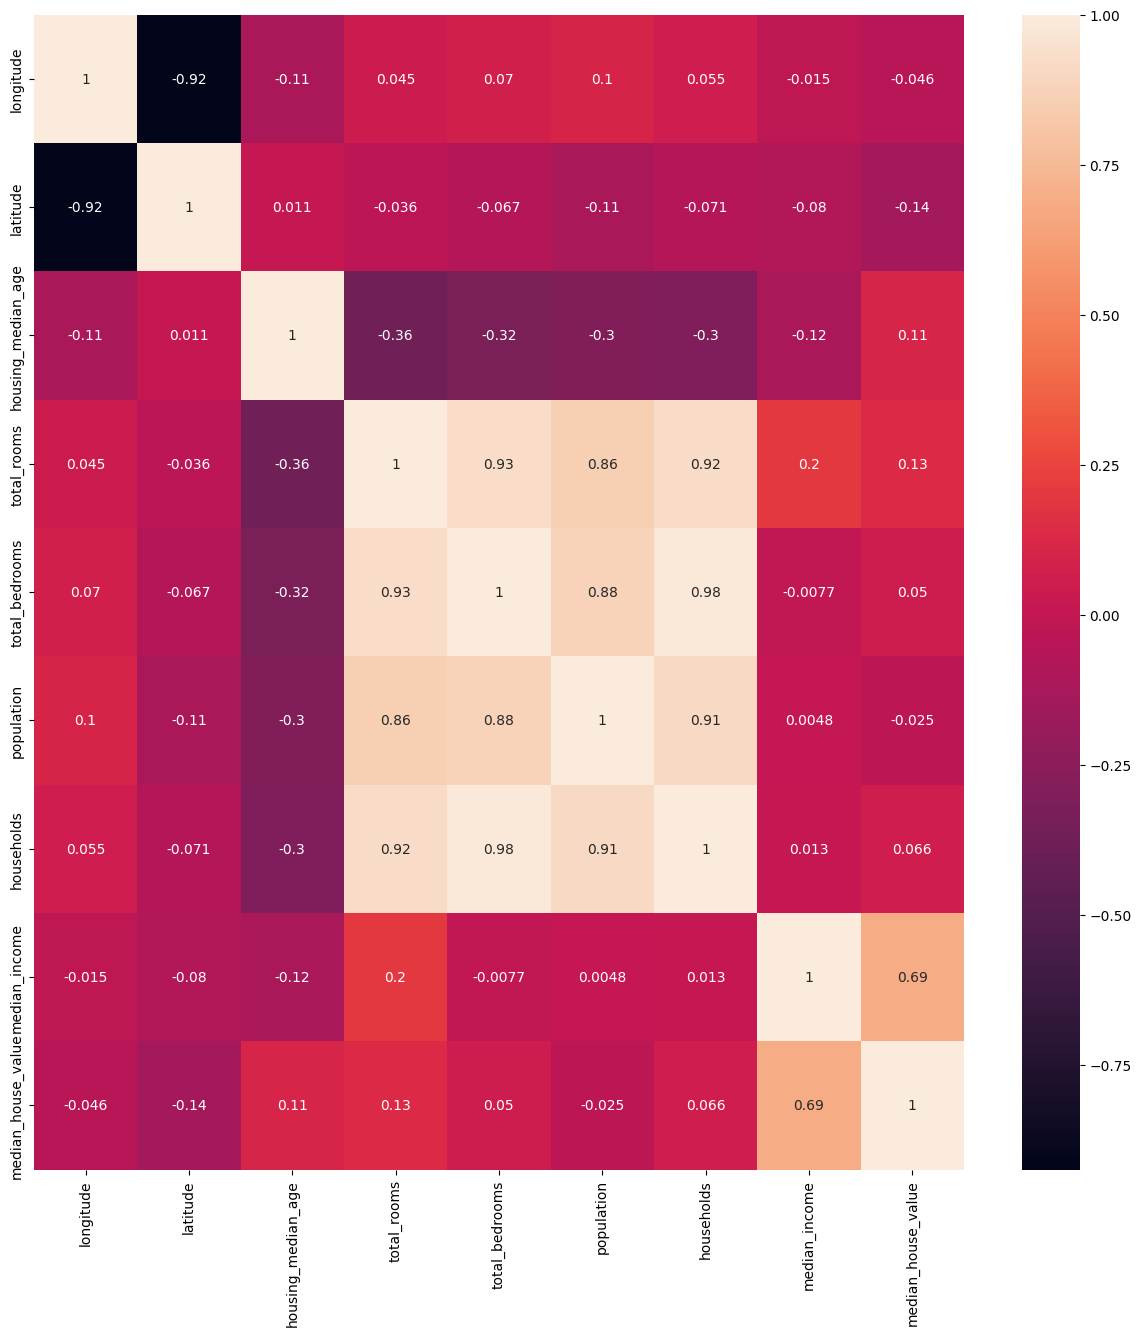

In [7]:
correlation_columns = list(housing.columns)
correlation_columns.remove('ocean_proximity')
cor = housing[correlation_columns].corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True)

## Creating a test set

In [8]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [9]:
## For illustration only. Sklearn has train_test_split()
# Uncomment those lines and test if wanted
def split_train_test_example(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# train_set, test_set = split_train_test_example(housing, 0.2)
# len(train_set)

### binning  median_income column

In [10]:
# As we see the median_income has a very high correlation with the median house value, so its a key feature


housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<Axes: >

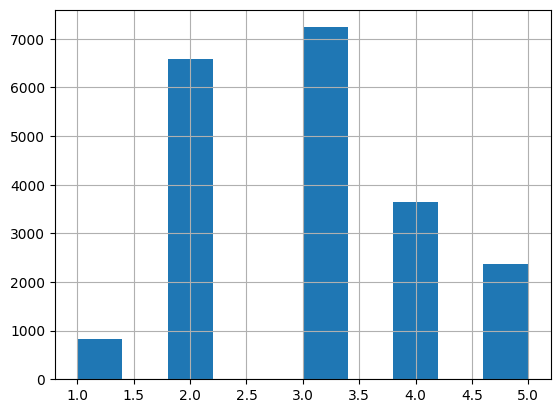

In [11]:
housing["income_cat"].hist()


## Dataset Split with stratified shuffle split

In [12]:
#Using the stratifiedshufflesplit (you can also try with train test split)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index] 

### As expected, we preserved the dataset distribution

In [13]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set) 

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and Visualize the Data to Gain Insights

In [15]:
housing = strat_train_set.copy() 

## Visualizing Geographical Data

<Axes: xlabel='longitude', ylabel='latitude'>

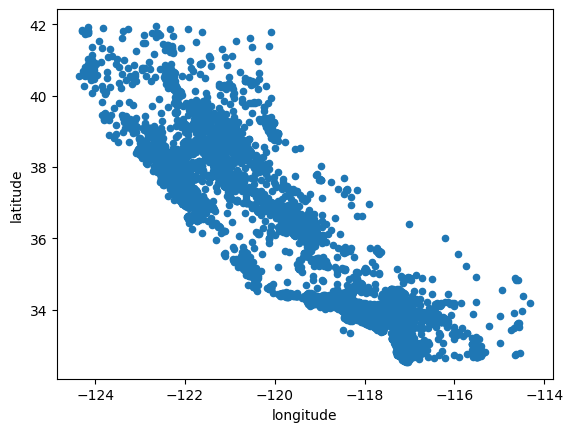

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

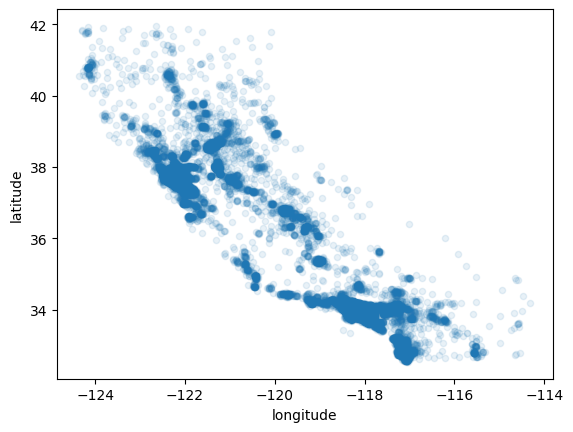

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

We could have ploted the California image here, and plot the data on top of it. Experiment doing that for better visualization

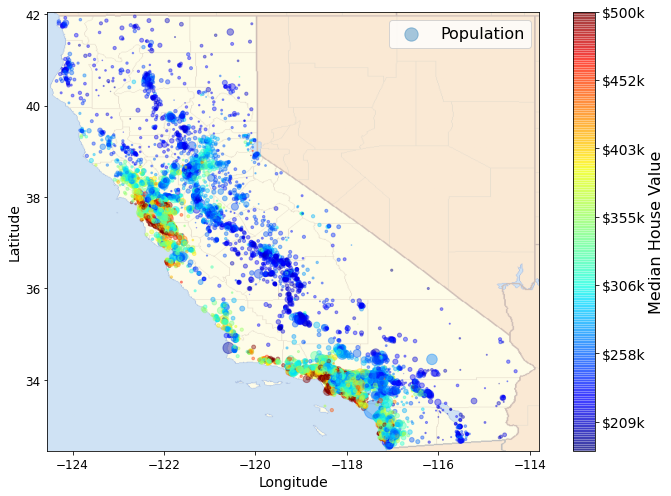

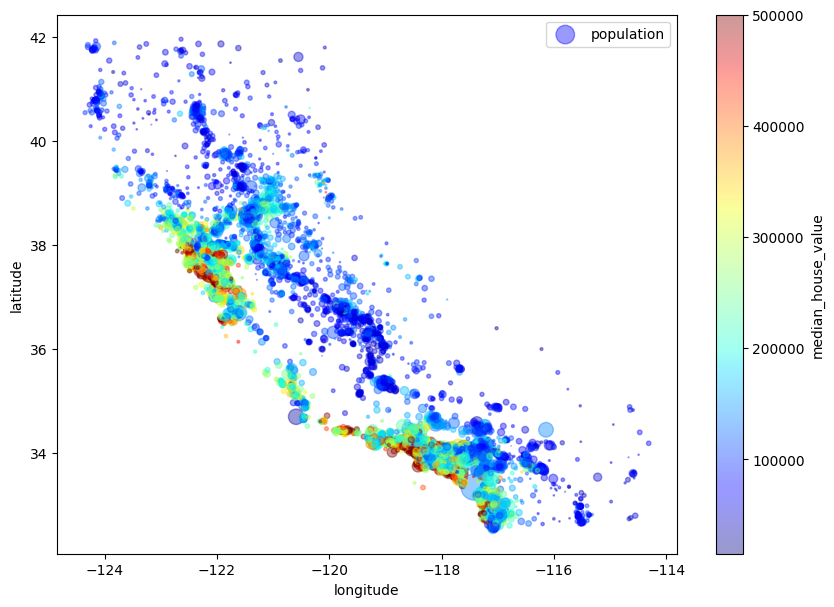

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,    s=housing["population"]/100, label="population", figsize=(10,7),    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, )
plt.legend()

# Looking for Correlations

In [19]:
correlation_columns = list(housing.columns)
correlation_columns.remove('ocean_proximity')
corr_matrix = housing[correlation_columns].corr()

In [20]:
#The correlations in respect to median_house_value
corr_matrix["median_house_value"].sort_values(ascending=False) 

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

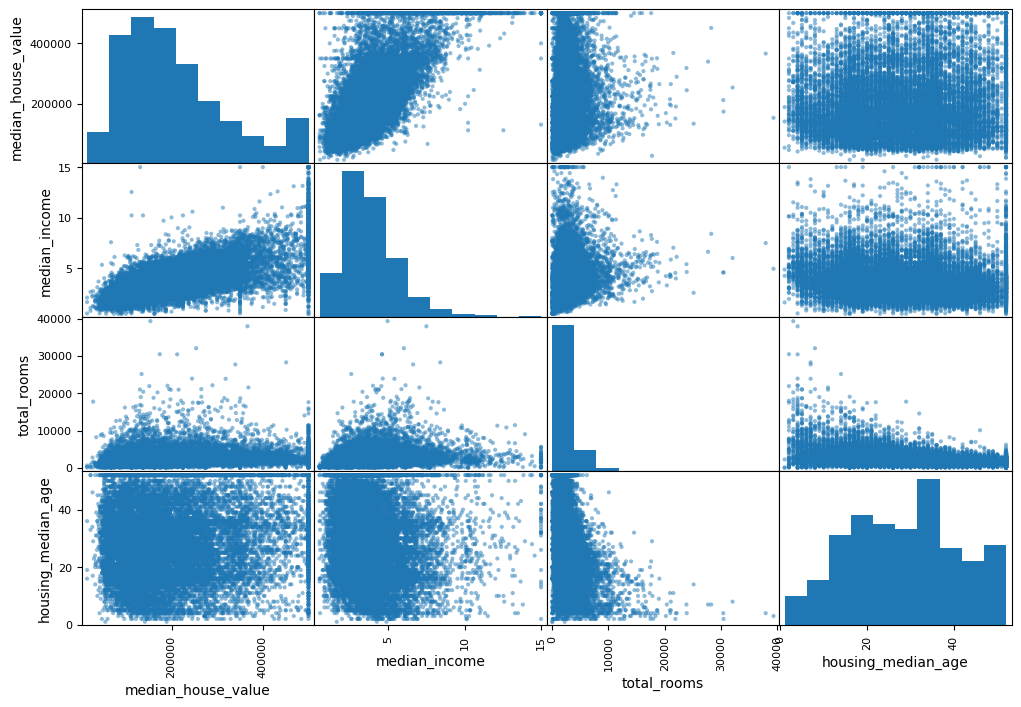

In [21]:
attributes = ["median_house_value", "median_income", "total_rooms",              
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

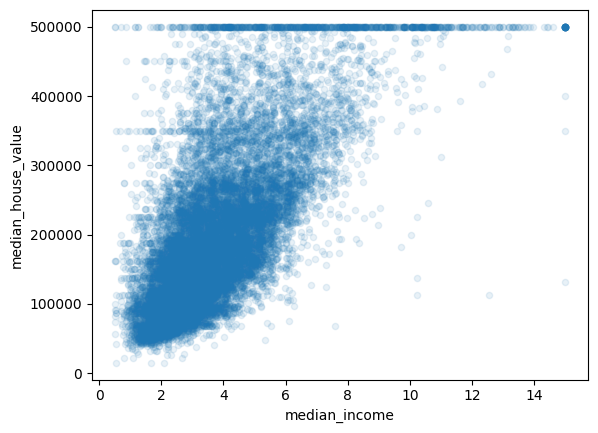

In [22]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",             
             alpha=0.1)

## Experimenting with attributes combinations 

In [23]:
#Creating more insightfull features using the raw data

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"] 
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"] 
housing["population_per_household"]=housing["population"]/housing["households"]

In [24]:
#Looking to the correlations with respect to the median house value (now including the new features)
correlation_columns = list(housing.columns)
correlation_columns.remove('ocean_proximity')
corr_matrix = housing[correlation_columns].corr()
corr_matrix["median_house_value"].sort_values(ascending=False) 

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithms 

In [25]:
# Reverting to a clean data set
# Separing the predictions and labels, since we don´t necessarily want to apply the same transformations on then

housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy() 

## Data cleaning 

Most machine learning algorithms cannot work with missing features, so we need to take care of them. We saw that the "total_bedrooms" attribute has some missing values. We have 3 options:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.). 

You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna() methods:

housing.dropna(subset=["total_bedrooms"])    => option 1 

housing.drop("total_bedrooms", axis=1)       => option 2 

median = housing["total_bedrooms"].median()  => option 3 

housing["total_bedrooms"].fillna(median, inplace=True)

If you choose option 3, you should compute the median value on the training set and use it to fill the missing values in the training set. Don’t forget to save the median value that you have computed. You will need it later to replace missing values in the test set when you want to evaluate your system, and also once the system goes live to replace missing values in new data. 

In that case we will use option 3 and do it with skelearn

In [26]:
imputer = SimpleImputer(strategy="median") 

# Since the median can only be calculated for numerical attributes we have to create a copy of the data without ... 
#... the text attribute "ocean_proximity"

housing_num = housing.drop("ocean_proximity", axis=1)


In [27]:
# Fitting the imputer instance in the trainning data using the fit() method:

imputer.fit(housing_num)

# The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable

SimpleImputer(strategy='median')

In [28]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [29]:
housing_num.median().values 

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [30]:
# Now you can use this “trained” imputer to transform the training set by replacing missing values with the learned medians:

X = imputer.transform(housing_num) 

# The result is a plain NumPy array containing the transformed features. 

In [31]:
# To put it back into a pandas dataframe:

housing_tr = pd.DataFrame(X, columns=housing_num.columns,   
                          index=housing_num.index)



## Handling text and categorical attributes

In [32]:
# Looking at the first 10 instances of the ocean_proximity 
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


We can see that it have categorical attributes. Most machine learning algorithms prefer to work with numbers, so let´s
convert those categories into numbers using Scikit-Learn’s OrdinalEncoder class

In [33]:
from sklearn.preprocessing import OrdinalEncoder 
ordinal_encoder = OrdinalEncoder() 
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10] 

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

You can get the list of categories using the categories_ instance variable.

In [34]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

We now shall convert these values into one-hot vector

In [35]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat) 
housing_cat_1hot 

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

By default, the OneHotEncoder class returns a sparse array, but we can convert it to a dense array if needed by calling the toarray() method:

In [36]:
housing_cat_1hot.toarray() 

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# Custom Transformers 

In [37]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6


In [38]:
# Creating a class

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):  #no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [39]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature Scaling

Scaling is one of the most important transformations you need to apply. Without it your machine learning algorithm will not perform very well. Note that in this case the householding data have very different scale, the total number of rooms ranges from about 6 to 39.320, while the median incomes only range from 0 to 15... 

There are two common ways to get all attributes to have the same scale: min-max scaling (normalization)   and   standardization

Sklearn provides classes to both of the strategies... 

We will create a pipeline for data transformation using sklearn Pipeline class


## Transformation Pipelines 

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [41]:
#Pipeline for the numerical data

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [42]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

We can use column transformer to transform all the collumns at once

In [43]:
from sklearn.compose import ColumnTransformer 

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

# Select and Train a Model 

## Training and Evaluating on the Training Set

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lin_reg = LinearRegression()
# training the model
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [46]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5] 
some_data_prepared = full_pipeline.transform(some_data) 
print("Predictions:", lin_reg.predict(some_data_prepared)) 
print("Labels:", list(some_labels))

Predictions: [ 86208. 304704. 153536. 185728. 244416.]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


### Measuring this regression model´s RMSE on the whole training set using Scikit-Learn´s mean_sqaure_error() function:

In [47]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68633.40810776998

This is better than nothing, but clearly not a great score: most districts’ median_hous ing_values range between 120,000 and 265,000, so a typical prediction error of $68,628 is not very satisfying. 

This is an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough


As we saw, the main ways to fix underfitting are to select a more powerful models, to feed the training algorithm with better features, or to reduce the constraints on the model.

Let´s train a DecisionTreeRegressor. This is a powerful model, capable of finding complex nonlinear relationships in the data

In [48]:
from sklearn.tree import DecisionTreeRegressor
# training the model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [49]:
#Now that the model is trained, let´s evaluate it on the training set:

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

tree_rmse

0.0

No error at all?? Of course it is much more likely that the model has badly overfit the data.. As we saw earlier, you don’t want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training and part of it for model validation.

## Better Evaluation Using Cross-Validation 

A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [50]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10) 
tree_rmse_scores = np.sqrt(-scores)


Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root

In [51]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [52]:
display_scores(tree_rmse_scores)

Scores: [71986.79997823 70252.88104551 68611.4232563  71334.36849238
 69131.7096422  78389.57726431 69625.8546555  72191.66502448
 69113.32575131 70089.64365945]
Mean: 71072.72487696694
Standard deviation: 2703.5007555625007


Let’s compute the same scores for the Linear Regression model just to be sure:


In [53]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                             scoring="neg_mean_squared_error", cv=10) 

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71800.38078269 64114.99166359 67844.95431254 68635.19072082
 66801.98038821 72531.04505346 73992.85834976 68824.54092094
 66474.60750419 70143.79750458]
Mean: 69116.4347200802
Standard deviation: 2880.6588594759014


That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model

Let’s try one last model now: the RandomForestRegressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor()

In [55]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)


In [56]:
forest_rmse

18657.77808174522

In [57]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                             scoring="neg_mean_squared_error", cv=10) 

forest_rmse_scores = np.sqrt(-forest_scores)

In [58]:
display_scores(forest_rmse_scores) 

Scores: [51211.30051482 48937.38627241 46834.05597442 52067.85568445
 47713.00249821 51932.45938321 52315.48335599 49593.73432224
 48616.67030384 53606.33228958]
Mean: 50282.82805991801
Standard deviation: 2133.2185520063504


#### Saving your models using joblib

You should save all models so you can compare the scores latter... 

In [59]:
#But for now we will just save the random forest model

import joblib

#joblib.dump(forest_reg, "random_forest_model.pkl")

#Later to run the model (without "re-trainning it"):

# load_model = joblib.load("random_forest_model.pkl")

In [60]:
# Saving


joblib.dump(forest_reg.fit(housing_prepared, housing_labels), "random_forest_model.pkl") #model already fitted

joblib.dump(housing_predictions, "random_forest_predictions.pkl") # Housing predictions


joblib.dump(forest_rmse_scores, "random_forest_scores.pkl") # Scores



['random_forest_scores.pkl']

In [61]:
# Using
load_model = joblib.load("random_forest_scores.pkl")

In [62]:
load_model

array([51211.30051482, 48937.38627241, 46834.05597442, 52067.85568445,
       47713.00249821, 51932.45938321, 52315.48335599, 49593.73432224,
       48616.67030384, 53606.33228958])

## Fine-Tune Your Model

### Grid Search 

In [63]:
from sklearn.model_selection import GridSearchCV


In [64]:
param_grid = [   
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, 
]

forest_reg = RandomForestRegressor()


grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [65]:
grid_search.best_params_ 

{'max_features': 6, 'n_estimators': 30}

In [66]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params) 


64695.34091276607 {'max_features': 2, 'n_estimators': 3}
55057.68122175879 {'max_features': 2, 'n_estimators': 10}
52640.1299169105 {'max_features': 2, 'n_estimators': 30}
61045.57601165375 {'max_features': 4, 'n_estimators': 3}
52957.45099116608 {'max_features': 4, 'n_estimators': 10}
50651.25812721368 {'max_features': 4, 'n_estimators': 30}
59401.04946429397 {'max_features': 6, 'n_estimators': 3}
52193.235825085394 {'max_features': 6, 'n_estimators': 10}
50024.754837895474 {'max_features': 6, 'n_estimators': 30}
58034.79780210866 {'max_features': 8, 'n_estimators': 3}
52316.559390107184 {'max_features': 8, 'n_estimators': 10}
50193.347699525104 {'max_features': 8, 'n_estimators': 30}
62593.59138280796 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54527.094331598135 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59400.785861039265 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52429.539687708915 {'bootstrap': False, 'max_features': 3, 'n_estimator

## Analyze the Best Models and Their Errors

In [67]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.61387375e-02, 7.20320461e-02, 4.16844992e-02, 1.84249941e-02,
       1.59906353e-02, 1.75671836e-02, 1.69614687e-02, 3.47493119e-01,
       7.15569439e-02, 1.05387840e-01, 5.94613820e-02, 1.28871524e-02,
       1.35860531e-01, 5.33419450e-05, 2.87762226e-03, 5.62250316e-03])

In [68]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"] 
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True) 


[(0.3474931189137865, 'median_income'),
 (0.1358605313124986, 'INLAND'),
 (0.10538783979610959, 'pop_per_hhold'),
 (0.07613873745798946, 'longitude'),
 (0.07203204611454868, 'latitude'),
 (0.07155694386049284, 'rooms_per_hhold'),
 (0.059461381981080405, 'bedrooms_per_room'),
 (0.041684499180764494, 'housing_median_age'),
 (0.018424994112390892, 'total_rooms'),
 (0.017567183565517553, 'population'),
 (0.01696146867714502, 'households'),
 (0.0159906353109645, 'total_bedrooms'),
 (0.012887152354866115, '<1H OCEAN'),
 (0.005622503160329981, 'NEAR OCEAN'),
 (0.0028776222564754978, 'NEAR BAY'),
 (5.334194504001017e-05, 'ISLAND')]

With this information, you may want to try dropping some of the less useful features (e.g., apparently only one ocean_proximity category is really useful, so you could try dropping the others). 

## Evaluate Your System on the Test Set

After tweaking your models for a while, you eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set. There is nothing special about this process; just get the predictors and the labels from your test set, run your full_pipeline to transform the data (call transform(), not fit_transform()—you do not want to fit the test set!), and evaluate the final model on the test set:


In [69]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1) 
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions) 
final_rmse = np.sqrt(final_mse)   # => evaluates to 47,730.2 

In some cases, such a point estimate of the generalization error will not be quite enough to convince you to launch: what if it is just 0.1% better than the model currently in production? You might want to have an idea of how precise this estimate is. For this, you can compute a 95% confidence interval for the generalization error using scipy.stats.t.interval():

In [70]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45963.82864273, 49847.46764084])

# Launch, Monitor, and Maintain Your System

Perfect, you got approval to launch! You now need to get your solution ready for production (e.g., polish the code, write documentation and tests, and so on). Then you can deploy your model to your production environment. One way to do this is to save the trained Scikit-Learn model (e.g., using joblib), including the full preprocessing and prediction pipeline, then load this trained model within your production environment and use it to make predictions by calling its predict() method. 

Here are a few things you can automate: 

• Collect fresh data regularly and label it (e.g., using human raters).

• Write a script to train the model and fine-tune the hyperparameters automatically. This script could run automatically, for example every day or every week, depending on your needs.

• Write another script that will evaluate both the new model and the previous model on the updated test set, and deploy the model to production if the performance has not decreased (if it did, make sure you investigate why)

Finally, make sure you keep backups of every model you create and have the process and tools in place to roll back to a previous model quickly, in case the new model starts failing badly for some reason

# Example of Training Multiple Models and Ploting Results

As you have noticed, the procedure for training and evaluating different models look very simmilar. When first start and exploring a problem, you may want to train multiple models, you can define a function to do so, and them show all results at once, making easier and cleaner to identify the best model and continue the development.

To exmplify, bellow I show some snapshots of a Classification Problem where I used this approach. Why don't you try doing it here? 

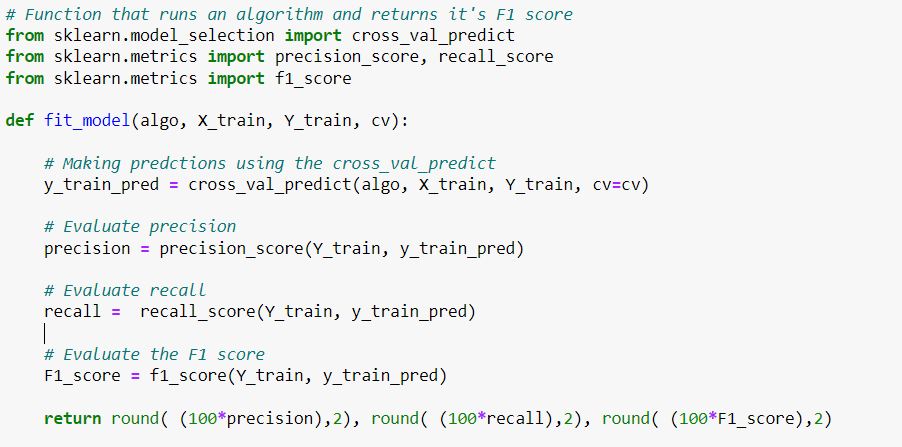

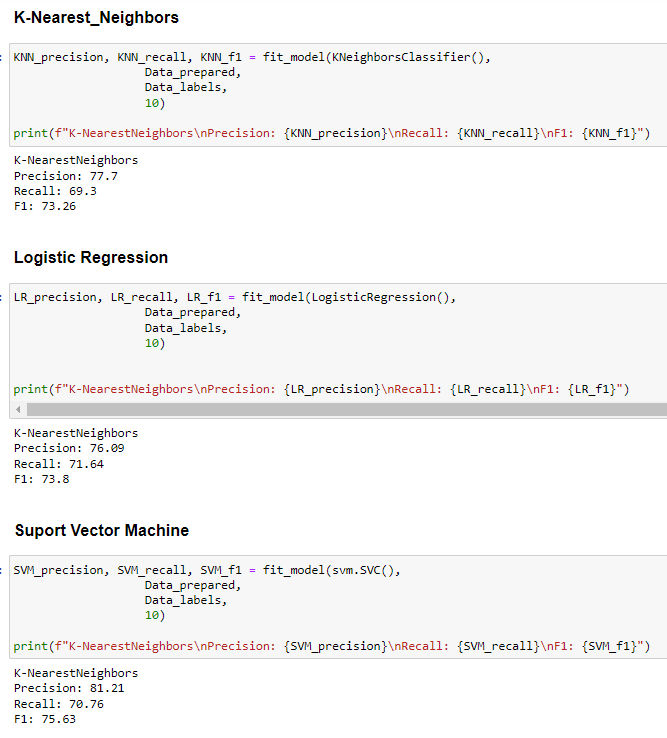

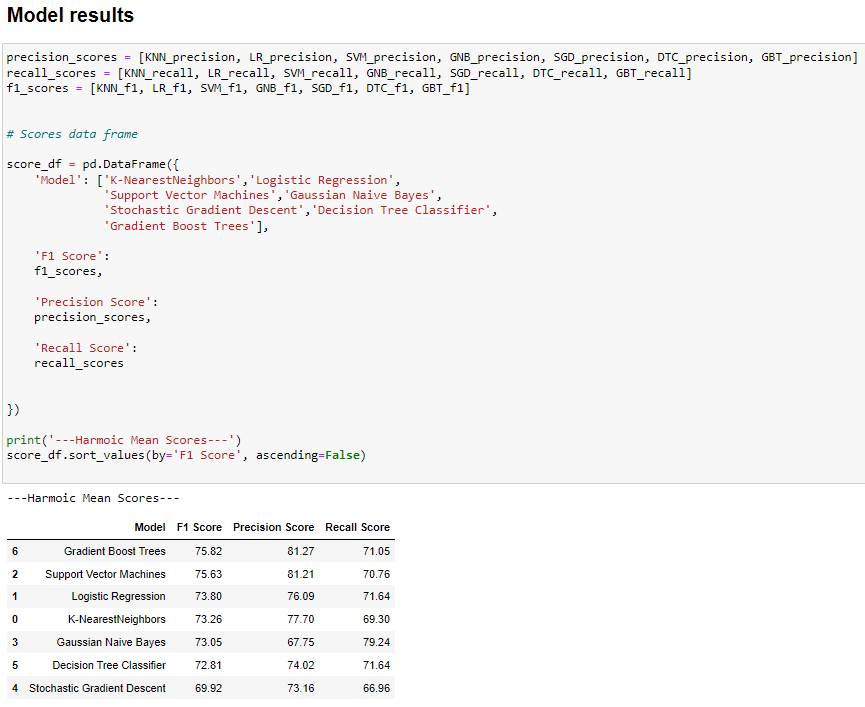